In [21]:
import pandas as pd
import glob
import os

# Path to your folder
folder_path = r"C:\Users\Dell\Precipitation_Prediction_Project_Janbubu\DATA_precipitation"

# Read all Excel files ending with _pivoted_values.xlsx
all_files = glob.glob(os.path.join(folder_path, "*_pivoted_values.xlsx"))

data_list = []

for file in all_files:
    # Read all sheets in the Excel file
    xls = pd.ExcelFile(file)
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet_name)
        
        # Extract region name from filename (before first "_")
        country_name = os.path.basename(file).split("_")[0]
        df["Region"] = country_name  # Add region column
        
        # Optional: add sheet name as City/Location column
        df["City"] = sheet_name
        
        data_list.append(df)

# Combine all Excel data into one DataFrame
combined_df = pd.concat(data_list, ignore_index=True)

print("✅ Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())


✅ Combined DataFrame shape: (4399, 12)
                         Sample Date Project Region Sample Site Name  \
0  1991-02-10T00:00:00.0000000+01:00  China/Wushiki           BATUAN   
1  1991-02-11T00:00:00.0000000+01:00  China/Wushiki           BATUAN   
2  1991-02-14T00:00:00.0000000+01:00  China/Wushiki           BATUAN   
3  1991-02-18T00:00:00.0000000+01:00  China/Wushiki           BATUAN   
4  1991-04-10T00:00:00.0000000+02:00  China/Wushiki           BATUAN   

   Latitude  Longitude  Altitude     H2    O18  Precipitation Region    City  \
0    40.595  80.858333    1030.0 -223.1 -26.05           0.10  China  BATUAN   
1    40.595  80.858333    1030.0  -91.8 -20.21           0.15  China  BATUAN   
2    40.595  80.858333    1030.0 -171.2 -21.21           0.20  China  BATUAN   
3    40.595  80.858333    1030.0 -175.7 -23.30           0.60  China  BATUAN   
4    40.595  80.858333    1030.0  -80.8 -11.24           5.90  China  BATUAN   

   d_excess  
0       NaN  
1       NaN  
2    

In [8]:
region_total = combined_df.groupby("Region").sum(numeric_only=True).reset_index()
region_total

,Region,Latitude,Longitude,Altitude,H2,O18,Precipitation
0,China,690.115000,1374.591667,17510.0,-1099.000000,-133.920000,36.15
1,Japan,8563.200000,33544.800000,960.0,-10474.565217,-1703.473973,27559.00
2,Korea,598.919452,2194.364726,1645.6,-705.900000,-121.150000,2494.80
3,Laos,1669.920000,8578.920000,25620.0,-3569.030769,-536.630769,8600.00
4,Mgl,6135.466667,13693.866667,171264.0,-13928.581818,-1805.236364,3057.00
5,Phillipine,196.560000,3506.440000,35420.0,-1382.162963,-218.510000,6185.00
6,Vietnam,1044.680000,5091.590000,29400.0,-2362.971739,-345.535217,3701.80


In [18]:
# Count the number of locations per region that have precipitation
# Assuming your precipitation column is named "Precipitation"
region_counts = combined_df[combined_df['Precipitation'].notna()].groupby(
    ["Region", "Latitude", "Longitude"]
).size().reset_index(name="Count")

# Now aggregate counts per region (sum of locations)
region_total = region_counts.groupby(["Region", "Latitude", "Longitude"]).sum(numeric_only=True).reset_index()


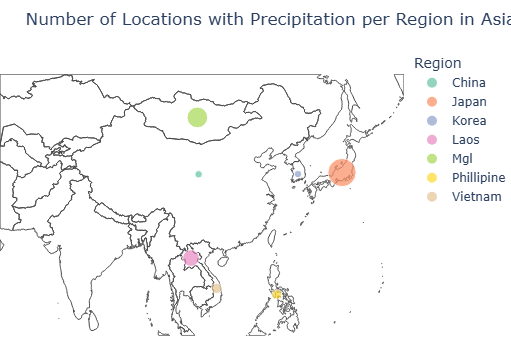

In [19]:
import plotly.express as px

# Filter for Asia
asia_df = region_total[
    (region_total['Latitude'] >= 5) & (region_total['Latitude'] <= 55) & 
    (region_total['Longitude'] >= 60) & (region_total['Longitude'] <= 150)
]

fig = px.scatter_geo(
    asia_df,
    lat="Latitude",
    lon="Longitude",
    size="Count",       # Bubble size based on number of locations
    color="Region",
    hover_name="Region",
    projection="natural earth",
    title="Number of Locations with Precipitation per Region in Asia",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_geos(
    visible=False, 
    resolution=50,
    showcountries=True, 
    lataxis_range=[5, 55],
    lonaxis_range=[60, 150]
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()
